<a href="https://colab.research.google.com/github/glazedonut/IEClusteingAnalysisProject/blob/master/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Roka Hosono, Veda Upasan Pedagadi, Jahnavi Chowdary Tumati
11/7/2022
Project 1: Cluster Analysis

[[-0.063274  0.027734  0.022683]
 [-0.000731  0.048211  0.069198]
 [-0.060767 -0.00908   0.053085]
 [ 0.013252 -0.011876  0.055324]
 [-0.054508 -0.003813  0.001738]]


C:\Users\hoson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hoson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[0, 2113.8796007670435, 244.54334427740412, 55.583558642105004, 60.77325439934975, 2.667355850400668, 105.123272923602, 120.03559075019814, 0.5624303448978623]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Unnamed: 0        X1        X2        X3  Class  cluster_class
0             1 -0.063274  0.027734  0.022683      1              0
1             2 -0.000731  0.048211  0.069198      1              0
2             3 -0.060767 -0.009080  0.053085      1              0
3             4  0.013252 -0.011876  0.055324      1              0
4             5 -0.054508 -0.003813  0.001738      1              0
.

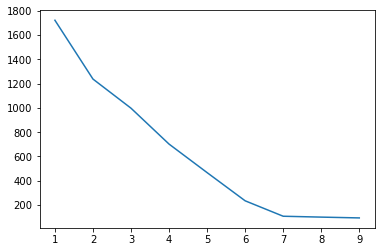

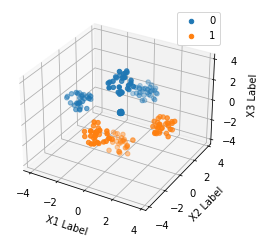

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
def intervention(indicies):
    interevent=[]
    for i in range(0,len(indicies)):
        if i==0:
            interevent.append(0)
        else:
            interevent.append(abs(indicies[i]-indicies[i-1]))
    return interevent
def create_elbow(file):
    data=pd.read_csv(file)
    coordinates=data[['X1','X2','X3']]
    print(coordinates.head().values)
    inertia=[]
    for i in range(1,10):
        k_means=KMeans(n_clusters=i,init='k-means++',random_state=42)
        k_means.fit(coordinates)
        inertia.append(k_means.inertia_)
    
    sns.lineplot(np.arange(1,10), inertia)
    dydx=[]
    for i in range(len(inertia)):
        dydx.append(inertia[i] - inertia[i-1])
    max_index = intervention(dydx).index(max(intervention(dydx)))
    print(intervention(dydx))
    opt_k=KMeans(n_clusters=max_index+1,init='k-means++',random_state=42)
    metrics=opt_k.fit_predict(coordinates)
    print(metrics)
    data['cluster_class']=metrics
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in data.cluster_class.unique():
        data2=data.loc[data['cluster_class']==i]
        print(data2)
        ax.scatter(data2['X1'], data2['X2'], data2['X3'],label=i)
    ax.set_xlabel('X1 Label')
    ax.set_ylabel('X2 Label')
    ax.set_zlabel('X3 Label')
    ax.legend()


create_elbow("data/data1.csv")